In [2]:
import pandas as pd
import statistics
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [3]:
prices = []
trades = []
for i in range(3):
    prices.append(pd.read_csv(f'.\\round-2-island-data-bottle\\round-2-island-data-bottle\\prices_round_2_day_{i-1}.csv', sep=';'))
    trades.append(pd.read_csv(f'.\\round-2-island-data-bottle\\round-2-island-data-bottle\\trades_round_2_day_{i-1}.csv', sep=';'))

prices_df = pd.concat(prices, axis=0)
trades_df = pd.concat(trades, axis=0)

# Update timestamps using iloc (positional indexing)
prices_df.iloc[80_000:160_000, prices_df.columns.get_loc('timestamp')] += 1_000_000
prices_df.iloc[160_000:240_000, prices_df.columns.get_loc('timestamp')] += 2_000_000

# Reset index if needed
prices_df.reset_index(inplace=True, drop=True)

In [4]:
prices_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,CROISSANTS,4304,112,NaN,NaN,NaN,NaN,4305,112,NaN,NaN,NaN,NaN,4304.5,0.0
1,-1,0,JAMS,6670,66,6669.0,137.0,NaN,NaN,6671,66,6672.0,137.0,NaN,NaN,6670.5,0.0
2,-1,0,SQUID_INK,2005,1,2002.0,31.0,NaN,NaN,2006,31,NaN,NaN,NaN,NaN,2005.5,0.0
3,-1,0,PICNIC_BASKET1,59284,20,59283.0,18.0,NaN,NaN,59294,2,59295.0,36.0,NaN,NaN,59289.0,0.0
4,-1,0,PICNIC_BASKET2,30606,20,30605.0,18.0,NaN,NaN,30612,20,30613.0,18.0,NaN,NaN,30609.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,1,2999900,JAMS,6519,204,NaN,NaN,NaN,NaN,6521,204,NaN,NaN,NaN,NaN,6520.0,0.0
239996,1,2999900,RAINFOREST_RESIN,9992,34,NaN,NaN,NaN,NaN,10008,34,NaN,NaN,NaN,NaN,10000.0,0.0
239997,1,2999900,SQUID_INK,1880,20,NaN,NaN,NaN,NaN,1884,20,NaN,NaN,NaN,NaN,1882.0,0.0
239998,1,2999900,PICNIC_BASKET1,58713,15,58712.0,21.0,NaN,NaN,58724,15,58725.0,21.0,NaN,NaN,58718.5,0.0


In [5]:
prices[0]

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,CROISSANTS,4304,112,NaN,NaN,NaN,NaN,4305,112,NaN,NaN,NaN,NaN,4304.5,0.0
1,-1,0,JAMS,6670,66,6669.0,137.0,NaN,NaN,6671,66,6672.0,137.0,NaN,NaN,6670.5,0.0
2,-1,0,SQUID_INK,2005,1,2002.0,31.0,NaN,NaN,2006,31,NaN,NaN,NaN,NaN,2005.5,0.0
3,-1,0,PICNIC_BASKET1,59284,20,59283.0,18.0,NaN,NaN,59294,2,59295.0,36.0,NaN,NaN,59289.0,0.0
4,-1,0,PICNIC_BASKET2,30606,20,30605.0,18.0,NaN,NaN,30612,20,30613.0,18.0,NaN,NaN,30609.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,-1,999900,DJEMBES,13493,76,NaN,NaN,NaN,NaN,13494,76,NaN,NaN,NaN,NaN,13493.5,0.0
79996,-1,999900,KELP,2028,31,NaN,NaN,NaN,NaN,2030,6,2031.0,31.0,NaN,NaN,2029.0,0.0
79997,-1,999900,RAINFOREST_RESIN,9992,32,NaN,NaN,NaN,NaN,10008,32,NaN,NaN,NaN,NaN,10000.0,0.0
79998,-1,999900,PICNIC_BASKET1,59222,2,59221.0,13.0,59220.0,27.0,59231,2,59232.0,13.0,59233.0,27.0,59226.5,0.0


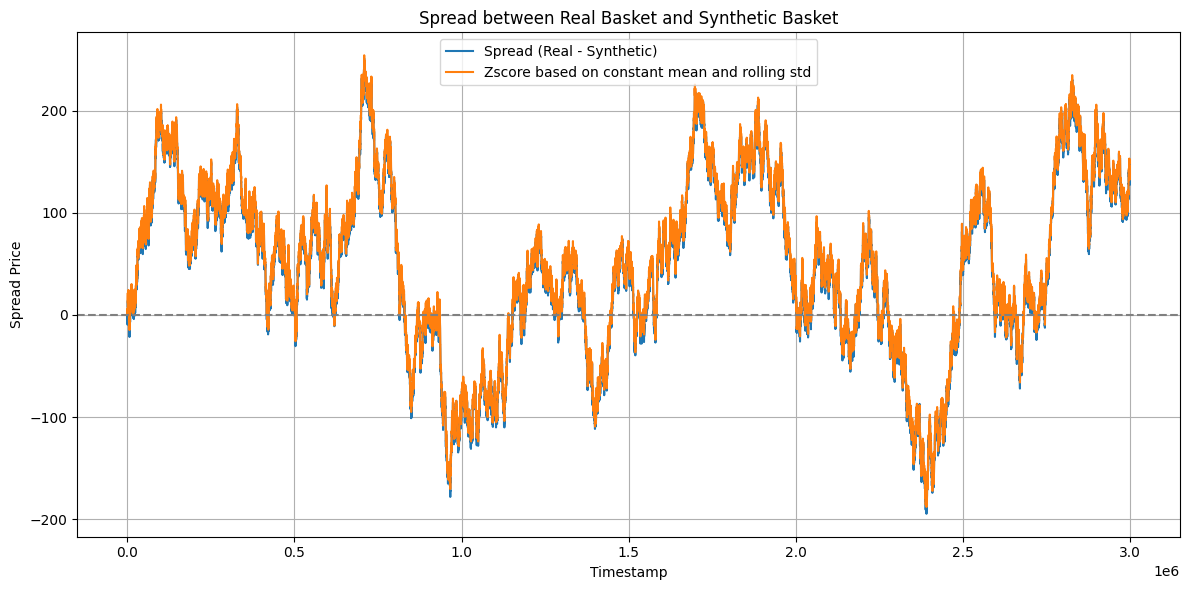

In [7]:
# Pivot to get each product's data separately
products = ['CROISSANTS', 'JAMS', 'DJEMBES', 'PICNIC_BASKET1']
df = prices_df[prices_df['product'].isin(products)]
pivoted = df.pivot(index='timestamp', columns='product', values='mid_price')

# Compute synthetic basket price
# Basket1 = 6 CROISSANTS + 3 JAMS + 1 DJEMBES
pivoted['synthetic_basket'] = (
    6 * pivoted['CROISSANTS'] +
    3 * pivoted['JAMS'] +
    1 * pivoted['DJEMBES']
)

# Calculate spread (assuming 'PICNIC_BASKET' is the real basket product)
pivoted['spread'] = pivoted['PICNIC_BASKET1'] - pivoted['synthetic_basket']
pivoted['zscore'] = pivoted['spread'].rolling(window=2).mean() + pivoted['spread'].rolling(window=5, min_periods=1).std()

# Plot the spread
plt.figure(figsize=(12, 6))
plt.plot(pivoted.index, pivoted['spread'], label='Spread (Real - Synthetic)')
plt.plot(pivoted.index, pivoted['zscore'], label='Zscore based on constant mean and rolling std')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Spread between Real Basket and Synthetic Basket')
plt.xlabel('Timestamp')
plt.ylabel('Spread Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
pivoted

product,CROISSANTS,DJEMBES,JAMS,PICNIC_BASKET1,synthetic_basket,spread,zscore
timestamp,,,,,,,
0,4304.5,13450.5,6670.5,59289.0,59289.0,0.0,NaN
100,4304.5,13450.0,6670.5,59287.0,59288.5,-1.5,0.310660
200,4304.5,13450.5,6671.0,59293.5,59290.5,3.0,3.041288
300,4304.5,13450.0,6672.0,59293.5,59293.0,0.5,3.620829
400,4305.5,13452.5,6672.0,59292.0,59301.5,-9.5,0.256574
...,...,...,...,...,...,...,...
2999500,4268.5,13418.5,6520.0,58720.5,58589.5,131.0,132.359196
2999600,4268.5,13417.5,6519.5,58719.5,58587.0,132.5,134.474885
2999700,4268.5,13418.0,6519.5,58715.0,58587.5,127.5,132.970690


In [9]:
statistics.correlation(pivoted['synthetic_basket'], pivoted['PICNIC_BASKET1'])

0.9722889725256894

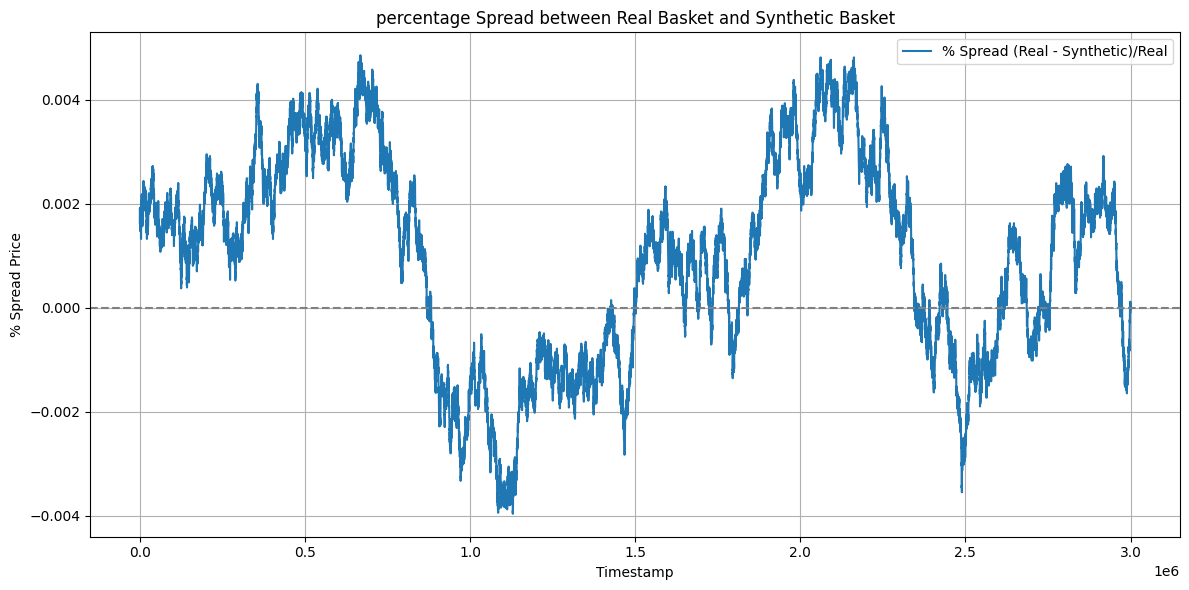

In [10]:
# Pivot to get each product's data separately
products = ['CROISSANTS', 'JAMS', 'DJEMBES', 'PICNIC_BASKET2']
df = prices_df[prices_df['product'].isin(products)]
pivoted = df.pivot(index='timestamp', columns='product', values='mid_price')

# Compute synthetic basket price
# Basket1 = 6 CROISSANTS + 3 JAMS + 1 DJEMBES
pivoted['synthetic_basket'] = (
    4 * pivoted['CROISSANTS'] +
    2 * pivoted['JAMS'] 
)

# Calculate spread (assuming 'PICNIC_BASKET' is the real basket product)
pivoted['spread'] = pivoted['PICNIC_BASKET2'] - pivoted['synthetic_basket']
pivoted['pct_spread'] = pivoted['spread'] / pivoted['PICNIC_BASKET2']

# Plot the spread
plt.figure(figsize=(12, 6))
plt.plot(pivoted.index, pivoted['pct_spread'], label='% Spread (Real - Synthetic)/Real')
plt.axhline(0, color='gray', linestyle='--')
plt.title('percentage Spread between Real Basket and Synthetic Basket')
plt.xlabel('Timestamp')
plt.ylabel('% Spread Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
def compute_spread(df: pd.DataFrame) -> pd.DataFrame:
    """
    Compute and add midprice and spread columns to the DataFrame.
    - midprice: average of best_bid and best_ask.
    - spread: difference between best_ask and best_bid.
    """
    df["best_ask"] = df[[f'ask_price_{i}' for i in range(1, 4)]].max(axis=1)
    df["best_bid"] = df[[f'bid_price_{i}' for i in range(1, 4)]].max(axis=1)
    df['spread'] = df['best_bid'] - df["best_ask"]
    return df

def analyze_product(df: pd.DataFrame, product: str):
    """
    For a given product, print out important statistical measures.
    This includes average midprice, average and standard deviation of spread,
    as well as volume statistics.
    """
    prod_df = df[df["product"] == product].copy()
    if prod_df.empty:
        print(f"No data for product: {product}")
        return
    

    # Descriptive statistics for midprice and spread.
    avg_mid = prod_df["mid_price"].mean()
    avg_spread = prod_df["spread"].mean()
    std_spread = prod_df["spread"].std()

    print(f"Product: {product}")
    print(f"  Average midprice: {avg_mid:.2f}")
    print(f"  Average spread: {avg_spread:.2f}")
    print(f"  Spread standard deviation: {std_spread:.2f}")
    print("  Spread quantiles (5%, 50%, 95%):")
    print(prod_df["spread"].quantile([0.05, 0.5, 0.95]).to_string())
    print()

    # Volume analysis.
    if "bid_volume" in prod_df.columns and "ask_volume" in prod_df.columns:
        avg_bid_vol = prod_df["bid_volume"].mean()
        avg_ask_vol = prod_df["ask_volume"].mean()
        print(f"  Average bid volume: {avg_bid_vol:.2f}")
        print(f"  Average ask volume: {avg_ask_vol:.2f}")
        print()

In [22]:
prices_df = compute_spread(prices_df)
analyze_product(prices_df, 'JAMS')

Product: JAMS
  Average midprice: 6593.32
  Average spread: -1.97
  Spread standard deviation: 0.17
  Spread quantiles (5%, 50%, 95%):
0.05   -2.0
0.50   -2.0
0.95   -2.0



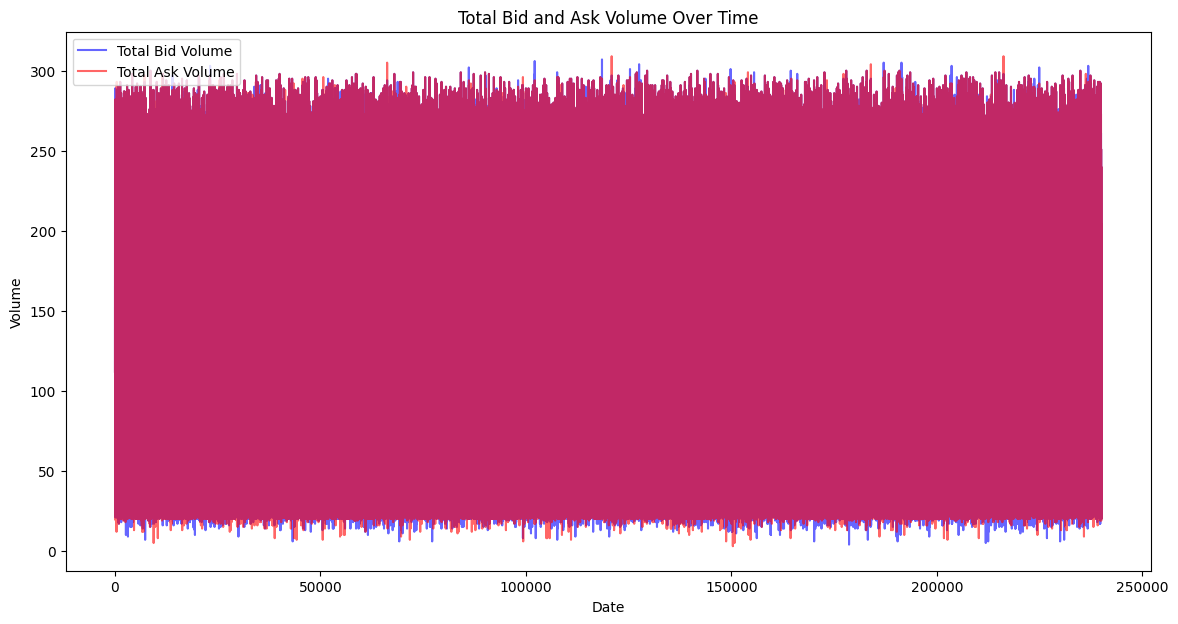

In [23]:
def analyze_order_volume(df):
    # Calculate total bid and ask volumes
    df['Total_Bid_Volume'] = df[['bid_volume_1', 'bid_volume_2', 'bid_volume_3']].sum(axis=1)
    df['Total_Ask_Volume'] = df[['ask_volume_1', 'ask_volume_2', 'ask_volume_3']].sum(axis=1)
    
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['Total_Bid_Volume'], label='Total Bid Volume', color='blue', alpha=0.6)
    plt.plot(df.index, df['Total_Ask_Volume'], label='Total Ask Volume', color='red', alpha=0.6)
    plt.title('Total Bid and Ask Volume Over Time')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.show()

# Example usage
analyze_order_volume(prices_df)

In [30]:
squid_df = prices_df[prices_df['product'] == 'SQUID_INK']
squid_df.mid_price.mean()

np.float64(1922.23695)